### Sprawozdanie - Minimalizacja funkcji
<div style="text-align: right"> Wojciech Kosztyła </div>


#### Zadanie 1 - Problem komiwojażera

Wygeneruj chmurę $n$ losowych punktów w 2D, a następnie zastosuj algorytm symulowanego wyżarzania
 do przybliżonego rozwiązania problemu komiwojażera dla tych punktów.

<br>

1. Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości $n$ oraz 3 różnych układów punktów w 2D
 - rozkład jednostajny,
 - rozkład normalny z czterema różnymi grupami parametrów,
 - dziewięc odseparowanych grup punktów).

<br>

2. Zbadaj wpływ sposobu generacji sąsiedniego stanu

 - <center>*consecutive swap* - zamiana kolejności losowej pary połączonych wierzchołków w ścieżce</center>

 <center>vs.</center>

 - <center>*arbitrary swap* - zamiana dwóch losowych wierzchołków w ścieżce)</center>

  oraz początkowej wartości temperatury na zbieżność procesu optymalizacji.

<br>

3. Przedstaw wizualizację działania procedury minimalizującej funkcję celu (funkcja przekazana do metody dual_annealing może modyfikować zewnętrzny stan)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Rozpocznę od stworzenia "chmury" losowych punktów w 2D.

In [2]:
def stworz_chmure(tryb, n):
    punkty = []

    if tryb == "rozklad_jednostajny":
        for i in range(n):
            wylosowana_kropka = np.random.uniform(-10.0, 10.0, size=2)
            punkty.append(wylosowana_kropka)


    elif tryb == "rozklad_normalny":    ## z podziałem na 4 parametry

        ilosc_parametrow = 4

        wartosc_oczekiwana = np.random.uniform(-10.0, 10.0, ilosc_parametrow)
        odchylenie_standardowe = np.random.uniform(0.68, 4.0, ilosc_parametrow)

        for i in range(ilosc_parametrow):
            poczatek_przedzialu = int( np.floor(i * n / ilosc_parametrow) )
            koniec_przedzialu   = int( np.floor((i+1) * n / ilosc_parametrow) - 1 )

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.normal(loc=wartosc_oczekiwana[i], scale=odchylenie_standardowe[i], size=2)
                punkty.append(wylosowana_kropka)

                iterator += 1


    else:   ## dziewięć odseparowanych grup punktów
        for i in range(9):
            poczatek_przedzialu = int( np.floor(i * n / 9) )
            koniec_przedzialu   = int( np.floor((i+1) * n / 9) - 1 )

            r = 5       # grupy rozkładam na kole o promieniu r
            kat = (i / 9) * (2 * np.pi)
            standardowy_x = r * np.cos(kat)     # punkt, wokół którego rozkładam grupę
            standardowy_y = r * np.sin(kat)

            iterator = poczatek_przedzialu
            while iterator <= koniec_przedzialu:

                wylosowana_kropka = np.random.uniform(-1.0, 1.0, size=2)
                wylosowana_kropka[0] += standardowy_x
                wylosowana_kropka[1] += standardowy_y
                punkty.append(wylosowana_kropka)

                iterator += 1

    return punkty

>  - rozkład jednostajny,

Sprowadziło się do najzwyklejszego pobierania $n$ liczb z `numpy.random.uniform`.

>  - rozkład normalny z czterema różnymi grupami parametrów,

Najpierw wylosowałem losowe wartości parametrów dla rozkładu normalnego.

Następnie utworzyłem wzór, dzielący ciąg $n$ liczb na równe $+-1~$ przedziały (aby dla każdej pary parametrów przypasować taką samą ilość losowanych liczb).

Na przedziale $[poczatek przedzialu, koniecprzedzialu]$ losowałem odpowiednie dwójki z `numpy.random.normal`.

>  - dziewięc odseparowanych grup punktów).

Zamiast losowo ustawiać grupy punktów, postanowiłem ustawić je w kontrolowalny sposób - na okręgu.

Losowe ustawienie nie gwarantowałoby "separacji".

Dzielenie przedziału wykonałem jak w poprzednim podpunkcie.

Do wylosowanej wartości z rozkładu jednostajnego dodawałem koordynaty "punktu na okręgu".

In [3]:
print( stworz_chmure("rozklad_jednostajny", 28) )

[array([-0.55788238,  9.63111013]), array([-0.28859625,  6.66935282]), array([-4.85418997,  9.01980599]), array([1.05533316, 6.03099446]), array([-8.62039161,  9.29091807]), array([-2.76510175, -0.523425  ]), array([8.62689405, 4.24700261]), array([-0.55789384,  2.59576095]), array([-1.8806065 ,  6.90454324]), array([-5.66127536,  9.16836383]), array([-2.2999527 ,  0.21704127]), array([-7.4093953 , -9.65476639]), array([9.71448468, 8.38804132]), array([-4.44185022,  7.96158624]), array([ 6.57736666, -5.10371238]), array([-2.90218919, -8.42735759]), array([7.13709438, 0.81805209]), array([-0.96070229,  6.36012354]), array([-7.7087201 ,  3.53492834]), array([-2.73466539,  5.98593938]), array([ 7.37899228, -4.5076254 ]), array([-3.78708985,  7.98714448]), array([-1.67747798,  0.56805019]), array([6.6668694 , 5.25679624]), array([-7.99609033, -9.32383779]), array([2.47326216, 9.62728739]), array([2.11756405, 5.67723478]), array([ 3.38200128, -8.66918503])]


In [4]:
print( stworz_chmure("rozklad_normalny",  28) )

[array([-3.85291613, -4.75068235]), array([ -8.44802017, -13.03863623]), array([-6.74471909, -3.27961431]), array([-5.89038489, -8.40405178]), array([-15.82420537,  -7.24118467]), array([-4.72644744, -6.29192099]), array([-11.23021008, -12.93246374]), array([-3.36267398, -3.9064299 ]), array([ 4.22481482, -1.475171  ]), array([-7.37315321,  0.72656239]), array([-7.48410645,  0.16267737]), array([-2.30651674, -4.5692064 ]), array([-5.7099534 , -2.43740683]), array([-0.34470015, -7.80452649]), array([-10.12856003,  -6.7309771 ]), array([-6.02222383, -4.82626253]), array([-0.39171141, -6.68297132]), array([-5.7031458 , -7.24428402]), array([-11.01042124,  -7.73184156]), array([-7.76818393, -4.45100338]), array([-8.13833018, -8.43481711]), array([-10.22566776,  -8.17165862]), array([-10.53511031,  -9.30841108]), array([-5.31015436, -6.70108416]), array([-7.79497487, -6.24725712]), array([-8.9687407 , -8.07418432]), array([-8.38523895, -5.56880119]), array([-11.81437121,  -5.44858963])]


In [5]:
print( stworz_chmure("separacja", 28) )


[array([ 5.29784577, -0.10432286]), array([ 5.65276139, -0.21326618]), array([5.06728634, 0.74807672]), array([4.46525308, 3.71491683]), array([4.12119539, 2.72612504]), array([4.73958917, 3.95948231]), array([0.64535622, 4.41220396]), array([1.75198646, 4.83309197]), array([1.84061597e-03, 4.25231049e+00]), array([-1.60665531,  5.10422701]), array([-2.41558389,  3.99780594]), array([-2.23681574,  3.43726738]), array([-4.99884244,  2.25578566]), array([-4.11304008,  2.30104589]), array([-5.35925629,  0.71181492]), array([-4.66567605, -1.18238559]), array([-5.40673114, -2.29027301]), array([-4.58792655, -1.21690119]), array([-3.47212752, -4.56657749]), array([-2.15097747, -3.79085892]), array([-3.06927558, -4.50557997]), array([ 0.54819379, -4.50205501]), array([ 1.38557118, -4.92391871]), array([ 1.26146551, -4.04472359]), array([ 4.79328504, -3.18018569]), array([ 4.61379248, -4.0464661 ]), array([ 3.10959667, -2.8405478 ]), array([ 4.05127813, -4.02903723])]


Jak widzimy, dane w takiej postaci nie pozwalają nam stwierdzić, czy losowanie spełnia podane założenia.

Zaimplementuję więc wyświetlanie takich list macierzy.

In [6]:
def wyswietl_chmure(chmura, tytul="Chmura punktów"):
    fig1, axis = plt.subplots(figsize=(10,10))

    axis.set_title(tytul)
    axis.set_xlabel("x")
    axis.set_ylabel("y")

    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])

    fig1.tight_layout()
    fig1.show()

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


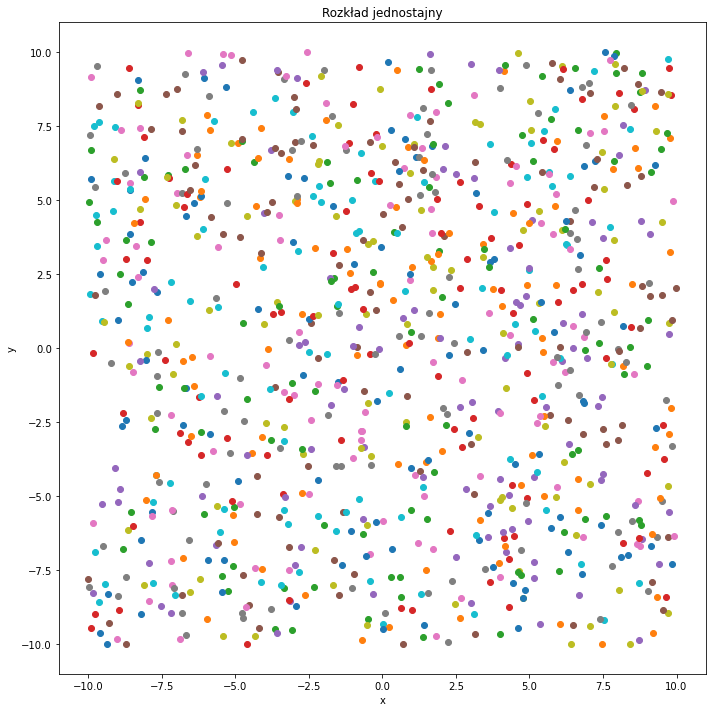

In [7]:
wyswietl_chmure( stworz_chmure("rozklad_jednostajny", 1000) , tytul="Rozkład jednostajny")

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


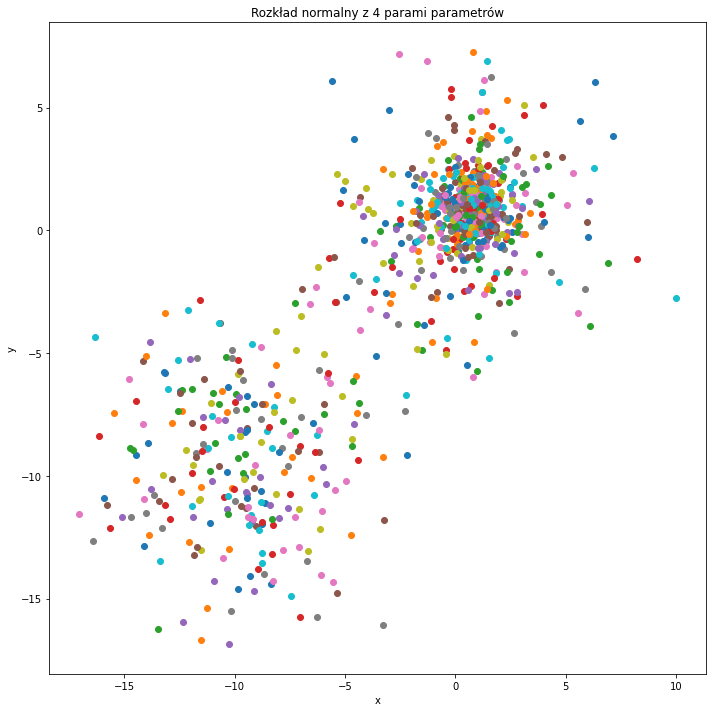

In [8]:
wyswietl_chmure( stworz_chmure("rozklad_normalny", 1000) , tytul="Rozkład normalny z 4 parami parametrów" )

<ipython-input-6-06f96107c9c6>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


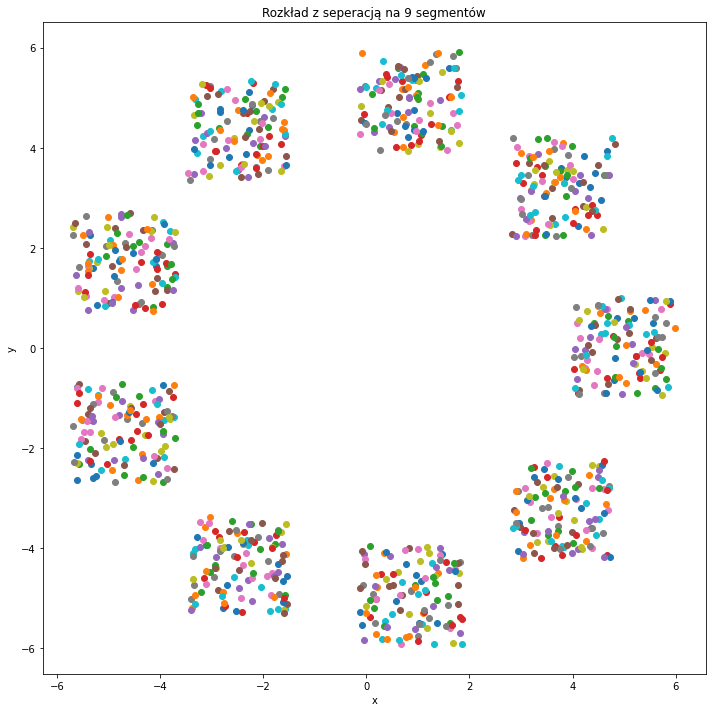

In [9]:
wyswietl_chmure( stworz_chmure("separacja", 1000)  , tytul="Rozkład z seperacją na 9 segmentów")


Teraz widzimy, że tworzenie "chmury" jest poprawne.


Zaimplementuję teraz własne wyżarzanie.


Wybór funkcji temperatury znacząco wpływa na wyniki szacowania najkrótszej drogi.

Po paru iteracjach wybrałem funkcję podaną w dokumentacji `scipy.optimize.dual_annealing`:

$T_{q_{v}}(t) = T_{q_{v}}(1) \frac{2^{q_{v}-1} -1}{(1+t)^{q_{v}-1}-1}$

In [10]:
T_1 = 5230

In [11]:
def temperatura(t):
    q_v = 2.0

    return T_1 * ( 2**(q_v - 1) - 1 ) / ( ( 1 + t )**(q_v - 1) - 1)


In [12]:
def P(e, e_prim, T):
    if e_prim < e:
        return 1
    else:
        return np.exp( -(e_prim - e)/T )

def energia_stanu(stan):
    dlugosc_sciezki = 0

    for id_miasta in range(len(stan) - 1):
        aa = (stan[id_miasta][0] - stan[id_miasta+1][0]) * (stan[id_miasta][0] - stan[id_miasta+1][0])
        bb = (stan[id_miasta][1] - stan[id_miasta+1][1]) * (stan[id_miasta][1] - stan[id_miasta+1][1])
        dlugosc_sciezki += np.sqrt( aa + bb )

    return dlugosc_sciezki

Energia stanu w przypadku prolemu komiwojażera to jest długość ścieżki, więc tutaj liczę sumę odległości punktów w ścieżce.


Teraz w samej funkcji wyżarzania implementuję dwie opcje:
 "arbitrary swap"(zamiana dwóch losowych miast) i "consecutive swap"(zamiana dwóch losowych, ale sąsiednich miast).


In [13]:
def simulatedAnnealing(startowa_sciezka, zmiana="arbitrary swap", k_max=1000):
    obecny_stan = startowa_sciezka

    for k in range(k_max):
        stan_iteracji = obecny_stan.copy()
        #T = temperatura( (k+1) / k_max )
        T = temperatura( k+1 )

        if zmiana=="arbitrary swap":
            indeks_pierwszego_miasta = np.random.randint(0, len(startowa_sciezka))

            indeks_drugiego_miasta = indeks_pierwszego_miasta
            while(indeks_drugiego_miasta == indeks_pierwszego_miasta):
                indeks_drugiego_miasta = np.random.randint(0, len(startowa_sciezka))

            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        elif zmiana=="consecutive swap":
            indeks_pierwszego_miasta = np.random.randint(1, len(startowa_sciezka) - 1)
            
            if(np.random.uniform(0.0,1.0,1) > 0.5):
                indeks_drugiego_miasta = indeks_pierwszego_miasta + 1
            else:
                indeks_drugiego_miasta = indeks_pierwszego_miasta - 1
                
            stan_iteracji[indeks_pierwszego_miasta], stan_iteracji[indeks_drugiego_miasta] = stan_iteracji[indeks_drugiego_miasta], stan_iteracji[indeks_pierwszego_miasta]
            
            
        else:
            print("Blad")
            return 0
        

        if P(energia_stanu(obecny_stan), energia_stanu(stan_iteracji), T) >= np.random.uniform(0.5, 1.0, 1):
            obecny_stan = stan_iteracji

    return obecny_stan


Teraz brakuje nam jedynie funkcji rysującej samą ścieżkę:

In [14]:
def wyswietl_sciezke(chmura, tytul="Sciezka punktów", dlugosc=-1):
    fig1, axis = plt.subplots(figsize=(10,10))

    if dlugosc==-1:
        axis.set_title(tytul)
    else:
        axis.set_title(tytul + " | Długość: " + str(dlugosc))
    axis.set_xlabel("x")
    axis.set_ylabel("y")


    for punkt in chmura:
        axis.scatter(punkt[0], punkt[1])
    chmura=np.array(chmura)
    axis.plot(chmura[:,0], chmura[:,1])

    fig1.tight_layout()
    fig1.show()

Przechodzę do testów.


In [15]:
temp_w = 100
temp_k = 10000

#### Rozkład jednostajny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


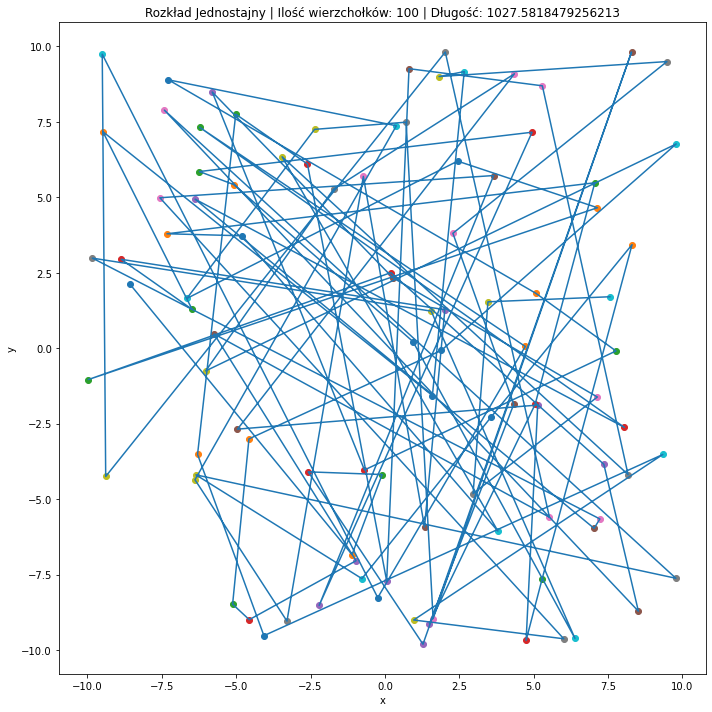

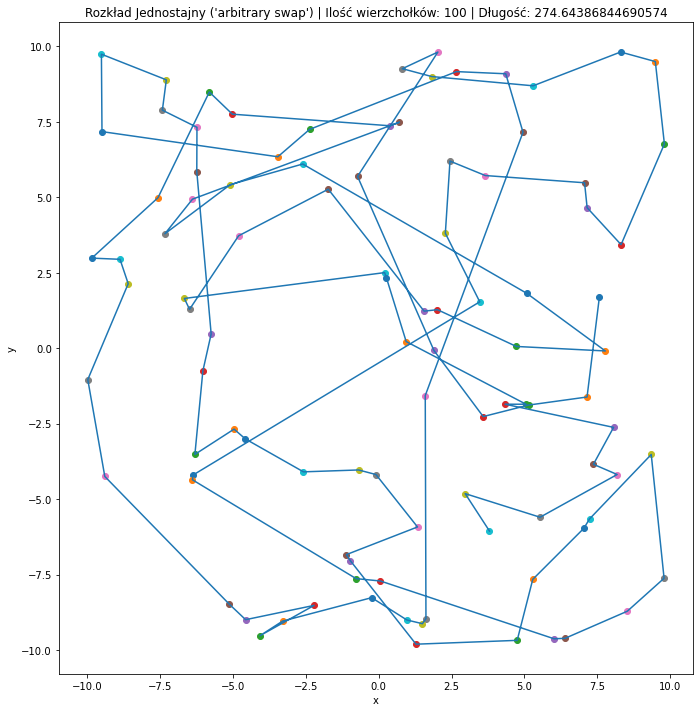

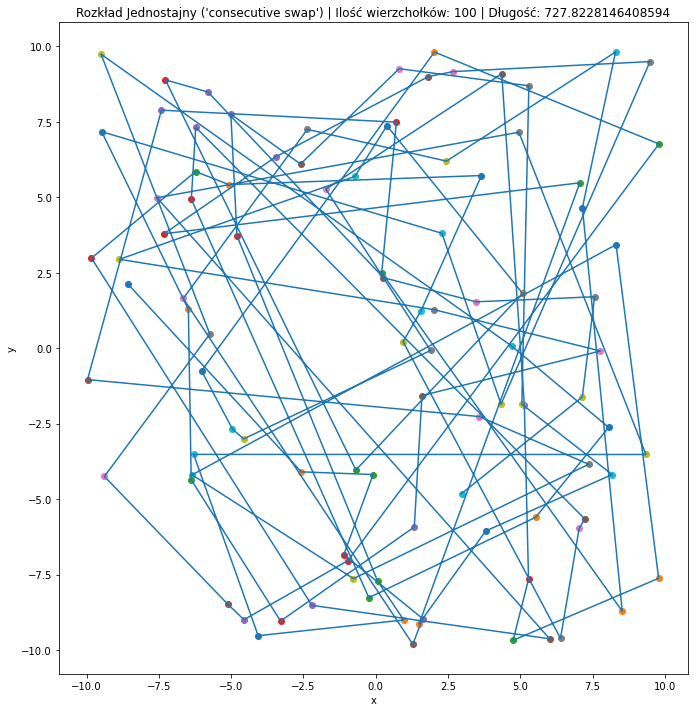

In [16]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


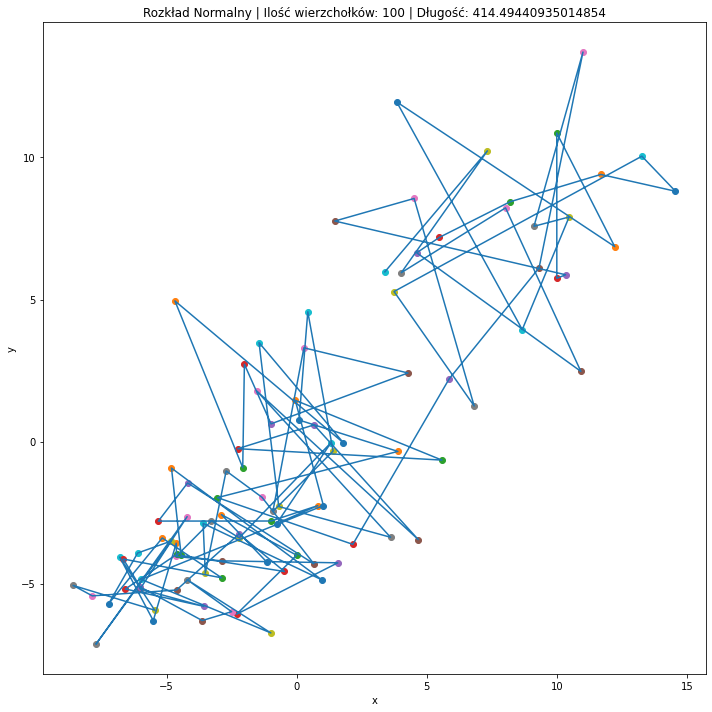

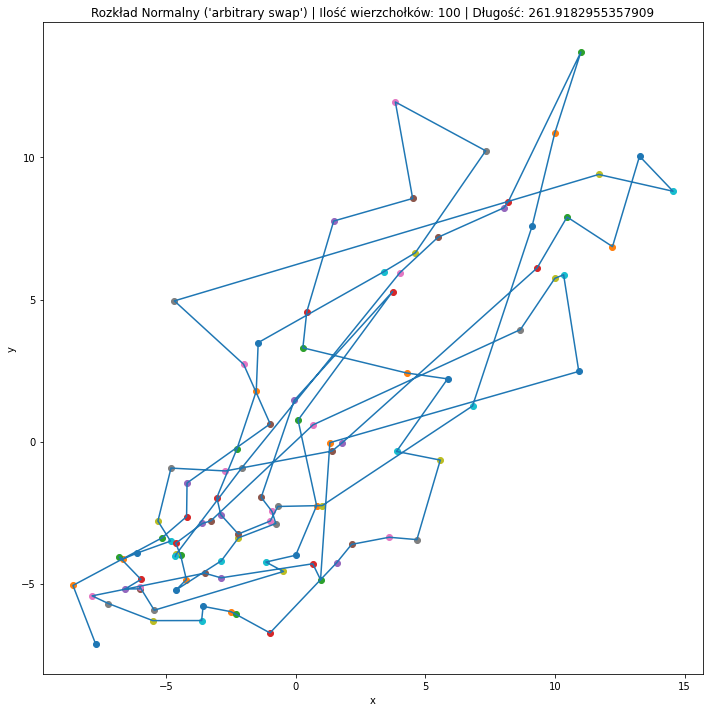

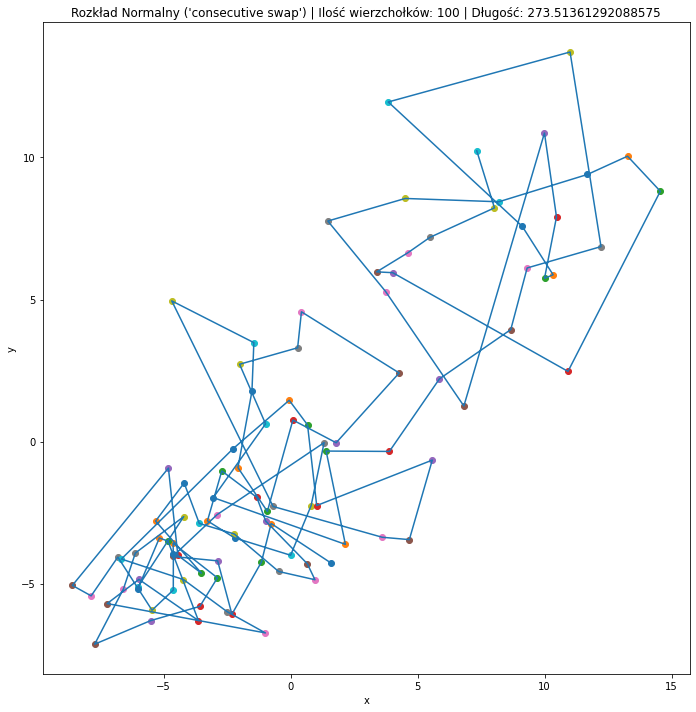

In [17]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


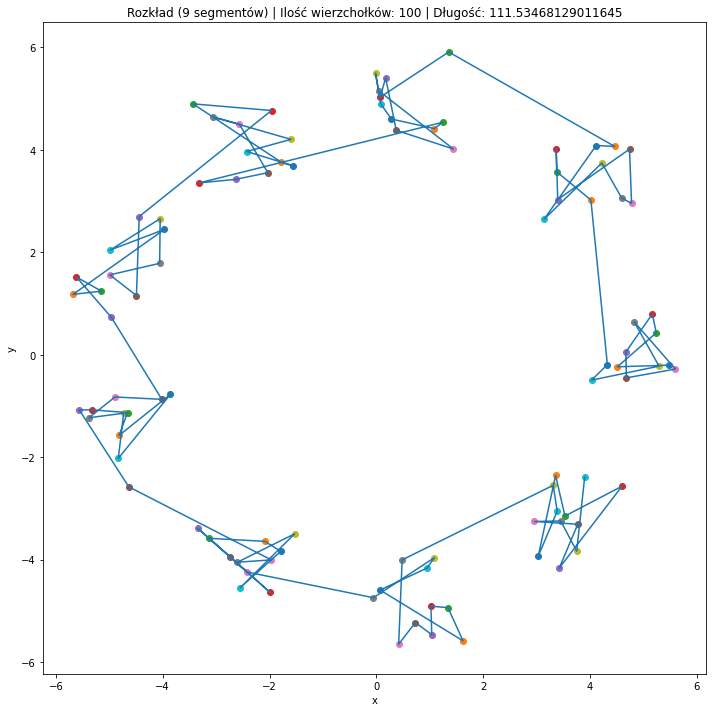

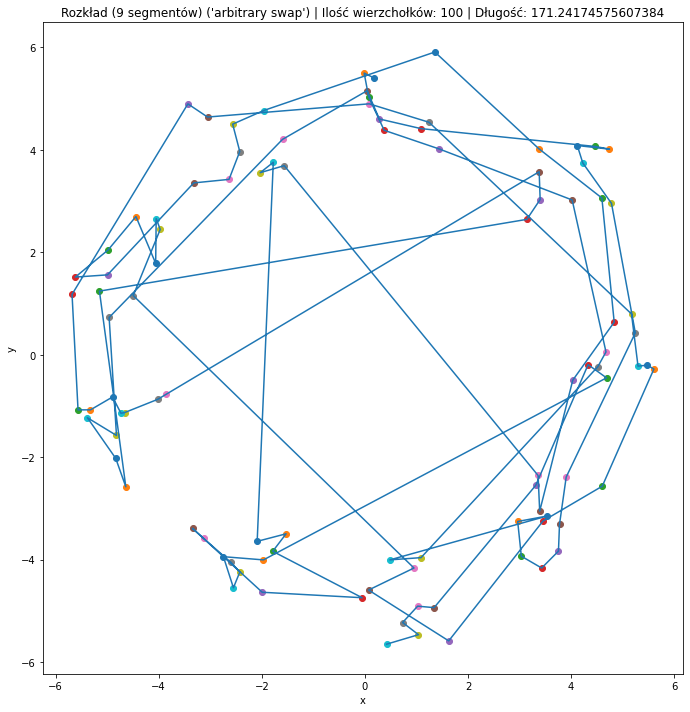

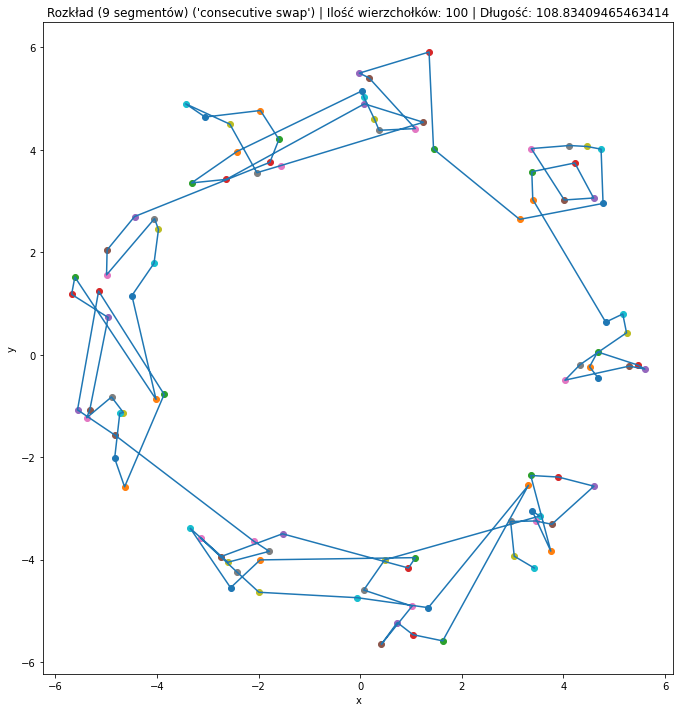

In [18]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


Wyniki nie są do końca zadowalające. W przypadku rozkładu z podziałem na 9 zdarza się, że "krótsza ścieżka" jest dłuższa od tej pierwszej!

Temperatura jednak była ustawiona na 5230.

Wykonam testy ponownie, dla zmniejszonej wartości początkowej temperatury.

In [19]:
T_1 = 52

#### Rozkład jednostajny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


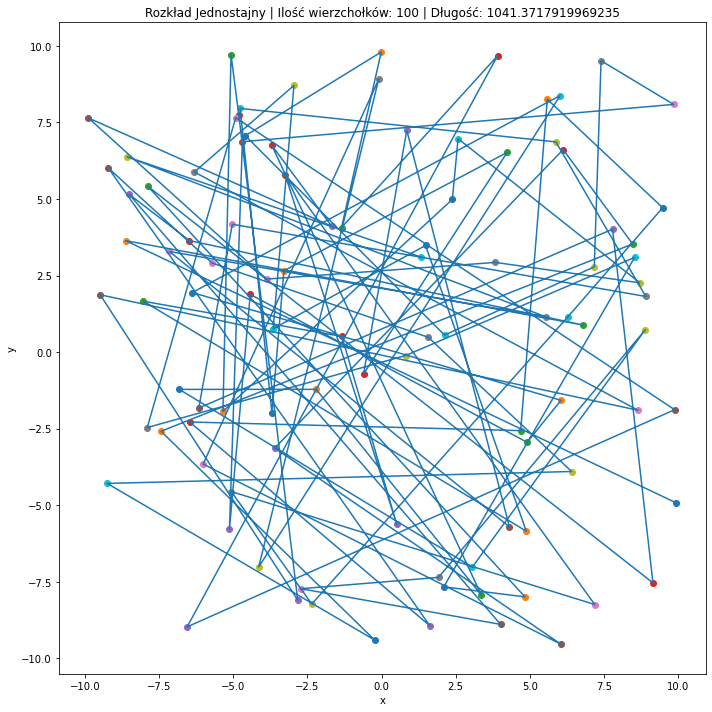

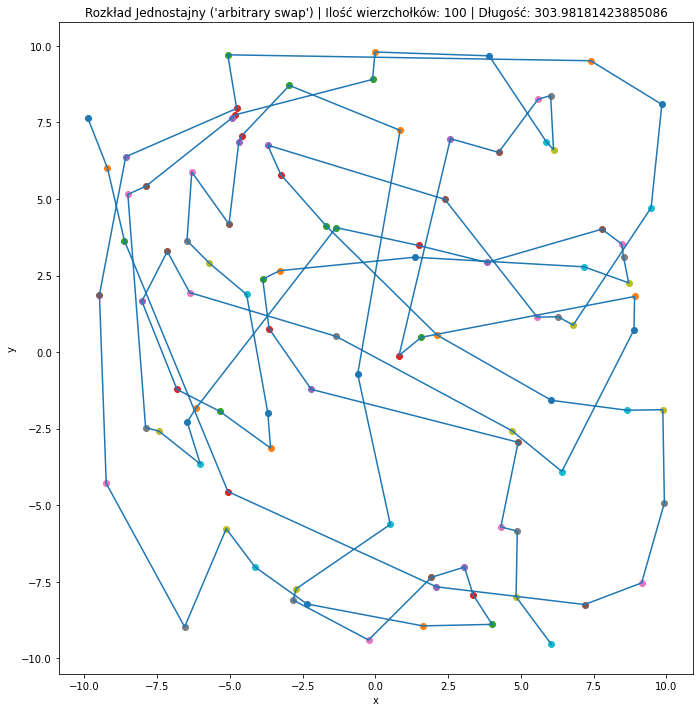

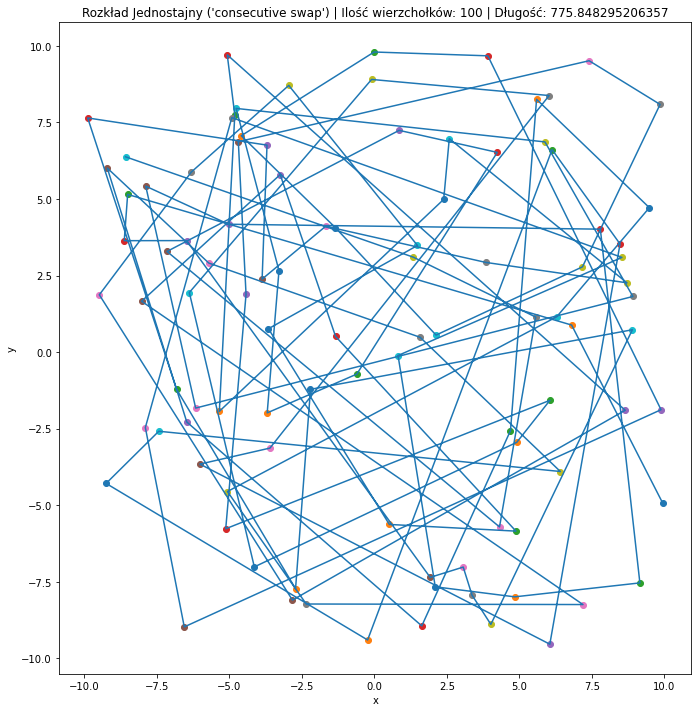

In [20]:
temp_rozklad = "Rozkład Jednostajny"

chmura = stworz_chmure("rozklad_jednostajny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład normalny

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


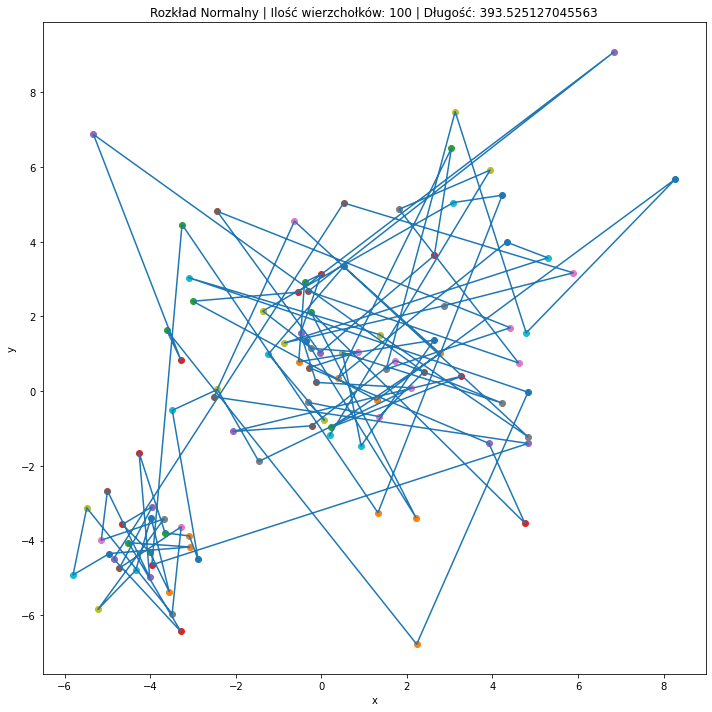

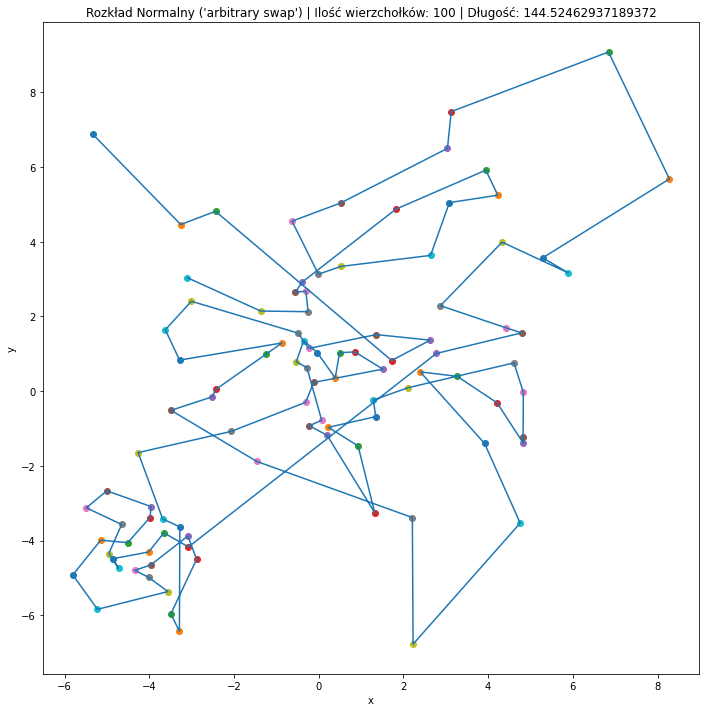

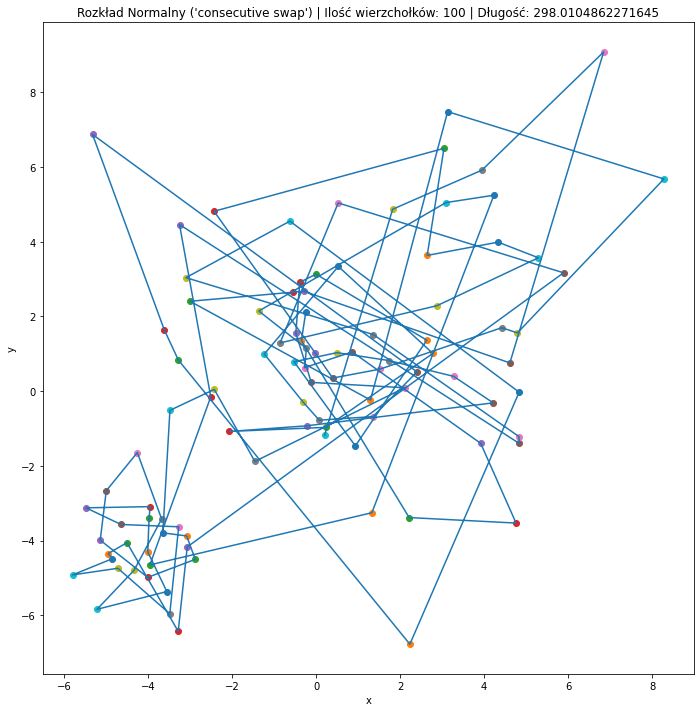

In [21]:
temp_rozklad = "Rozkład Normalny"

chmura = stworz_chmure("rozklad_normalny", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


#### Rozkład z podziałem na 9 segmentów

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


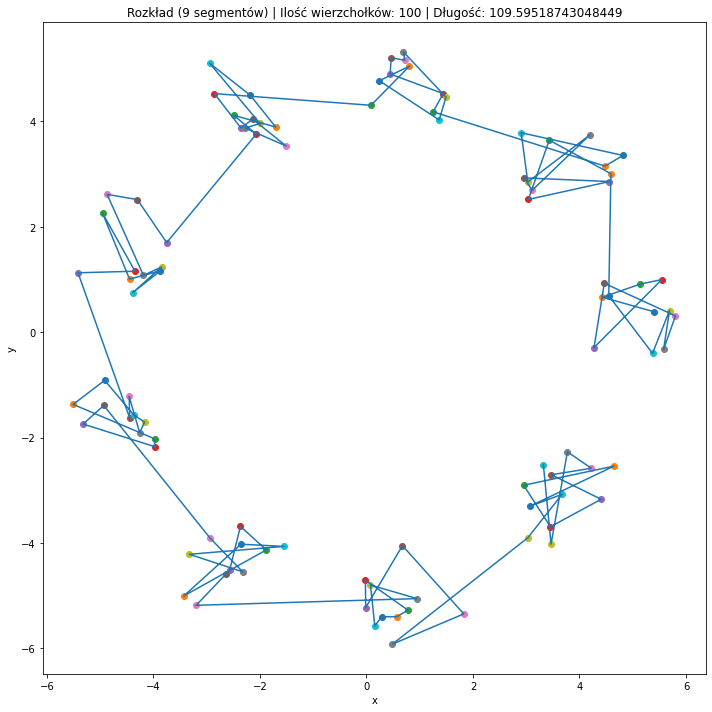

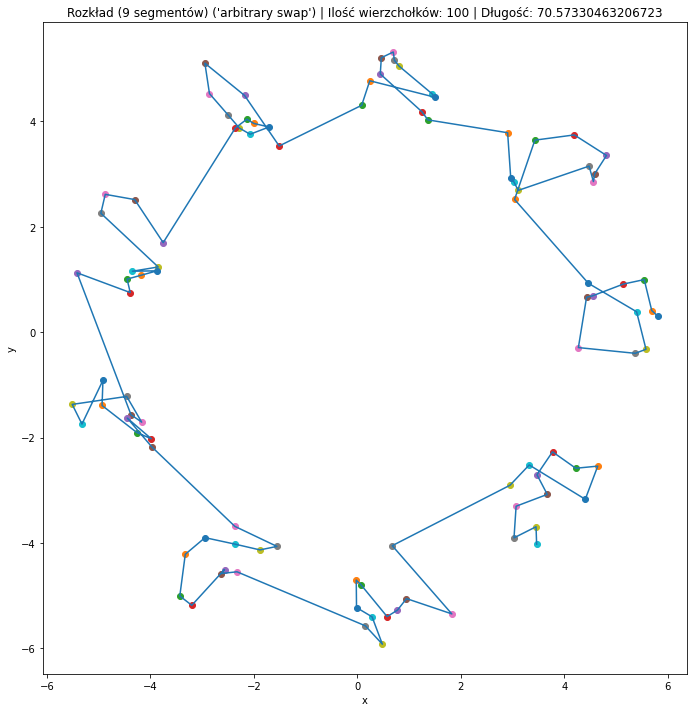

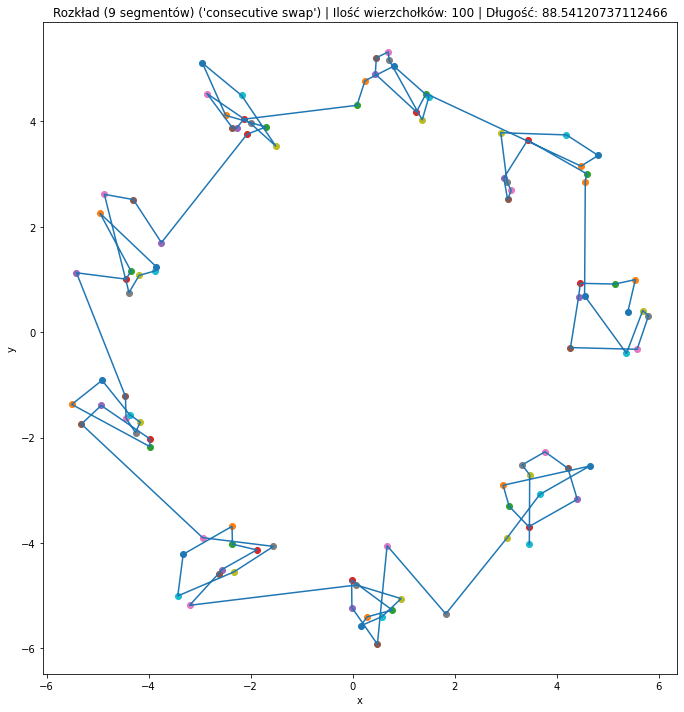

In [22]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


Te wyniki dla niższej temperatury są już dużo bardziej zadowalające.

Powodem takiej zmiany jest fakt, że funkcja prawdopodobieństwa w dużej mierze zależy od podanej temperatury.
Im wolniej zmienia się temperatura, tym większa szansa, że znalezione rozwiązanie będzie optymalne.
(źródło: Wikipedia - [link](https://en.wikipedia.org/wiki/Simulated_annealing#The_annealing_schedule)).

W kwestii `arbitrary swap` vs `consecutive swap` - w moich testach zawsze ten pierwszy zdawał się dawać lepsze rezultaty.

Ten drugi ma potencjał w sytuacjach takich jak podział na 9 segmentów,
gdzie losowe dobieranie dwóch miast, które najprawdopodobniej są mocno od siebie oddalone bardzo rzadko skutkować będzie polepszeniem stanu.

Dla 100 wierzchołków nie jest lepszy, ale jak spróbuję dla większej ilości:

In [23]:
temp_w = 1000
temp_k = 100000

<ipython-input-14-0fb8817a4397>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


KeyboardInterrupt: 

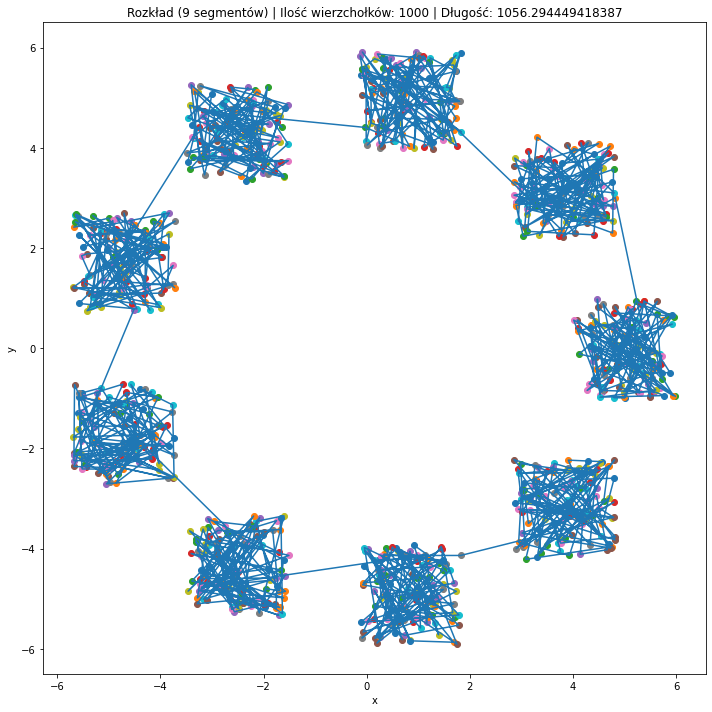

In [24]:
temp_rozklad = "Rozkład (9 segmentów)"

chmura = stworz_chmure("separate", temp_w)
wyswietl_sciezke(chmura, tytul=temp_rozklad + " | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="arbitrary swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('arbitrary swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))


nowa_chmura = simulatedAnnealing(chmura, zmiana="consecutive swap", k_max=temp_k)
wyswietl_sciezke(nowa_chmura, tytul=temp_rozklad + " ('consecutive swap') | Ilość wierzchołków: " + str(temp_w), dlugosc=energia_stanu(nowa_chmura))

Sytuacja znacząco się zmieniła (na korzyść `consecutive swap`).

Do wizualizacji wykorzystam `imageio`.

In [ ]:
import imageio

In [ ]:
def wizualizuj(frames = 1200, skala=2):

    chmura_do_wizualizacji = stworz_chmure("rozklad_jednostajny", 100)

    zapisane_klatki = []

    for _ in range(frames):
        nowa_chmura_do_wizualizacji = simulatedAnnealing(chmura_do_wizualizacji, zmiana="arbitrary swap", k_max=skala)

        fig1, axis = plt.subplots(figsize=(10,10))

        axis.set_title("Rozkład Jednostajny | Wierzchołki: 100 | Długość: " + str(energia_stanu(nowa_chmura_do_wizualizacji)))
        axis.set_xlabel("x")
        axis.set_ylabel("y")


        for punkt in chmura:
            axis.scatter(punkt[0], punkt[1])
        chmura=np.array(chmura)
        axis.plot(chmura[:,0], chmura[:,1])

        fig1.tight_layout()
        fig1.canvas.draw()
        image = np.frombuffer(fig1.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig1.canvas.get_width_height()[::-1] + (3,))

        zapisane_klatki.append(image)

        chmura_do_wizualizacji = nowa_chmura_do_wizualizacji

    kwargs_write = {'fps':60.0, 'quantizer':'nq'}
    imageio.mimsave('./wizualizacja.gif', zapisane_klatki, fps=60)

wizualizuj()
